In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_7664\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[1422]

Unnamed: 0                         1422.000000
EPIC ID                       220265249.000000
Teff                               3617.342800
logg                                  4.691400
Flare #                               1.000000
Observation time                     78.682700
Average flare duration                0.449494
Longest flare duration                0.449494
Shortest flare duration               0.449494
Average percentage increase        1090.507126
Highest percentage increase        1090.507126
Lowest percentage increase         1090.507126
Name: 1422, dtype: float64

In [4]:
flc = from_mast("220265249", mode="LC", mission="K2")

9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

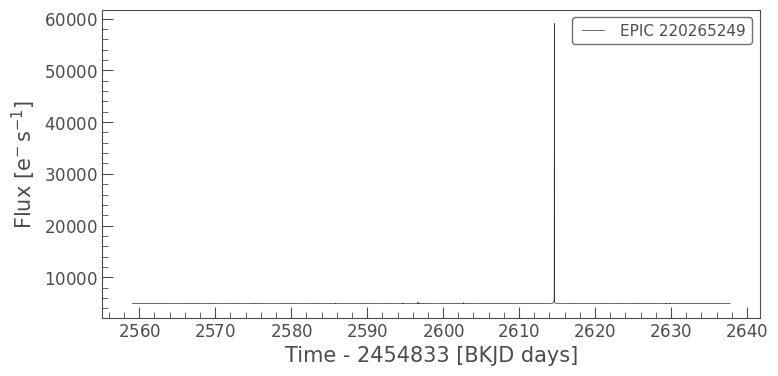

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

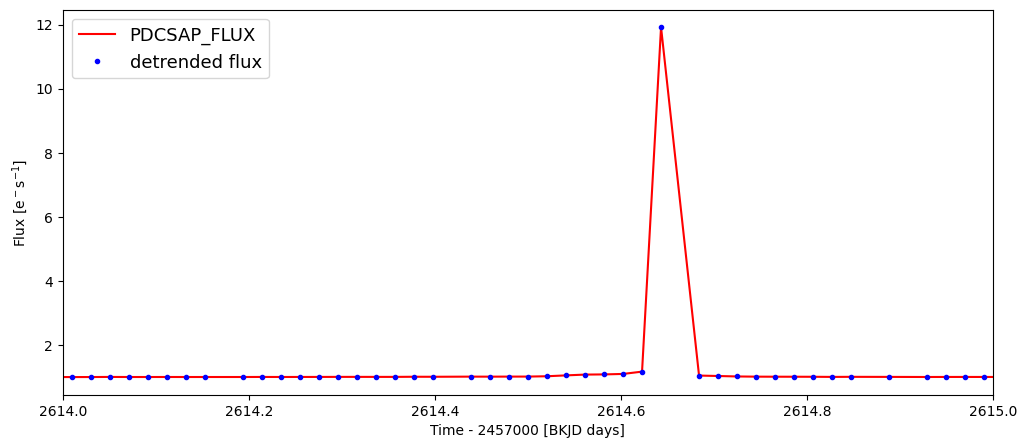

In [7]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2614, 2615)
#plt.ylim(.95,1.25)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,2464,2484,122614,122636,2614.377682,2614.827176,39694.33395399431,5.675330457863613,10.905071258544922,0.449494,3491.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,16) gap.
Found 0 candidate(s) in the (16,66) gap.
Found 0 candidate(s) in the (66,1276) gap.
Found 0 candidate(s) in the (1276,2424) gap.
Found 1 candidate(s) in the (2424,2514) gap.
Found 0 candidate(s) in the (2514,2575) gap.
Found 0 candidate(s) in the (2575,3491) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
